In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
import statsmodels.formula.api as sm

In [4]:
from scipy.optimize import minimize, curve_fit

In [5]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, KFold, GridSearchCV


In [22]:
## read in data :
adv_data = pd.read_csv("advertising_data.csv")

In [7]:
## Looking into file and their columns .

def file_details(filename):

    print(filename.head())
    print("\n")
    print(filename.info())
    print("\n")
    print(filename.isnull().sum())

In [8]:
file_details(adv_data)

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

In [23]:
## Simplify column names 
adv_data.rename(columns = {"Daily Time Spent on Site" : "Daily_time_spent","Area Income" : "Area_income" ,"Daily Internet Usage" : 'Daily_internet_usage' , 'Ad Topic Line' : 'topic' , "Clicked on Ad" : 'Clicked' }, inplace = True)

In [24]:
adv_data.columns

Index(['Daily_time_spent', 'Age', 'Area_income', 'Daily_internet_usage',
       'topic', 'City', 'Male', 'Country', 'Timestamp', 'Clicked'],
      dtype='object')

In [25]:
adv_data['Date'] = pd.to_datetime(adv_data['Timestamp'])

In [26]:
adv_data['Hour'] = adv_data['Date'].dt.hour

In [27]:
adv_data['Month'] = adv_data['Date'].dt.month

In [28]:
## Monday =0 , Sunday = 6
adv_data['Dayofweek'] = adv_data['Date'].dt.dayofweek

In [29]:
adv_data['Weekofyear'] = adv_data['Date'].dt.weekofyear

In [30]:
adv_data.head()

,Daily_time_spent,Age,Area_income,Daily_internet_usage,topic,City,Male,Country,Timestamp,Clicked,Date,Hour,Month,Dayofweek,Weekofyear
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11,0,3,6,12
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02,1,4,0,14
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42,20,3,6,10
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19,2,1,6,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18,3,6,4,22


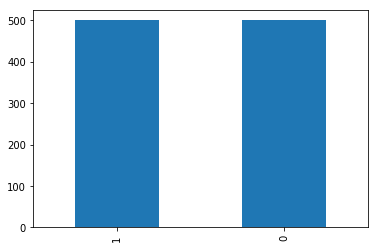

In [8]:
## How many clicked on ads ?
adv_data['Clicked'].value_counts().plot.bar()

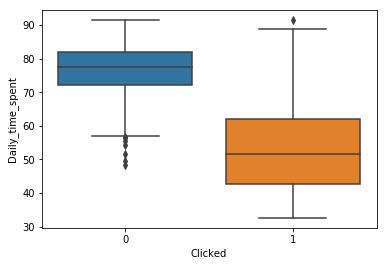

In [9]:
## Visualize the spread of some continuous data by those who clicked or not . 
sns.boxplot('Clicked', 'Daily_time_spent', data = adv_data )

Mean time spent on te website by those who clicked the advertisement is about 50% lesser  than those who didnt .

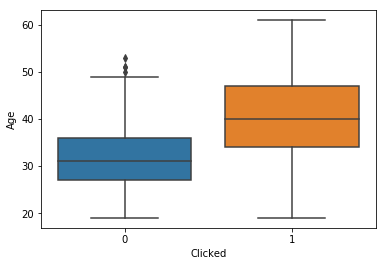

In [10]:
sns.boxplot('Clicked', 'Age', data = adv_data )

Those clicking the advertisements are older with the difference in their average being 10 years .

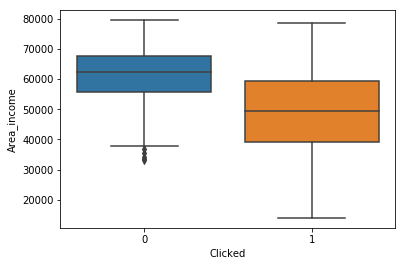

In [11]:
sns.boxplot('Clicked', 'Area_income', data = adv_data )

Those who clicked on the advertisement have an average area income lesser than those who didnt click by 1/5th .  

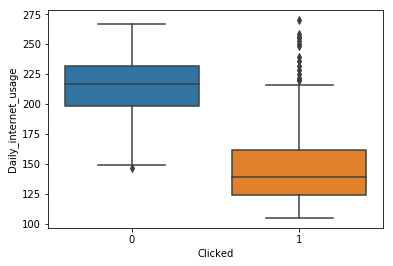

In [12]:
sns.boxplot('Clicked', 'Daily_internet_usage', data = adv_data )

Average daily internet usage of those who don't click on the advertisement is 70% more than the those who click on the advertisements. 

Text(0.5,1,'Hour when Adv was clicked')

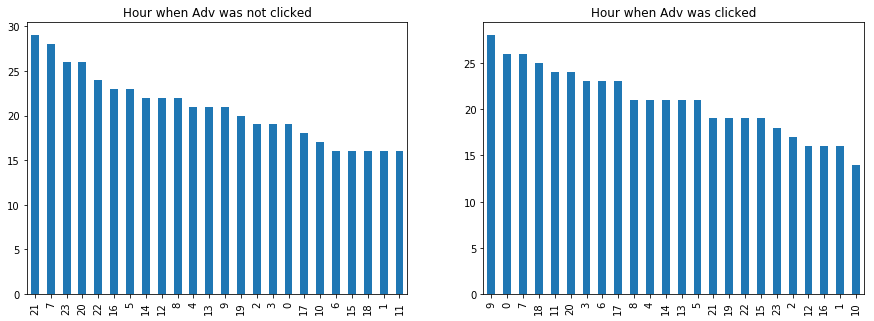

In [37]:
## On what times of the day was the website visited  ? And by those who clicked and didnt ?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = adv_data[adv_data['Clicked'] ==0]['Hour'].value_counts().plot(kind = 'bar')
plt.title('Hour when Adv was not clicked')
plt.subplot(1,2,2)
ax2 = adv_data[adv_data['Clicked'] == 1]['Hour'].value_counts().plot(kind = 'bar')
plt.title('Hour when Adv was clicked')


More number of people Click advertisement in the morning hours when compared with top 5 hour slots . 

Text(0.5,1,'Day of week  when Adv was clicked')

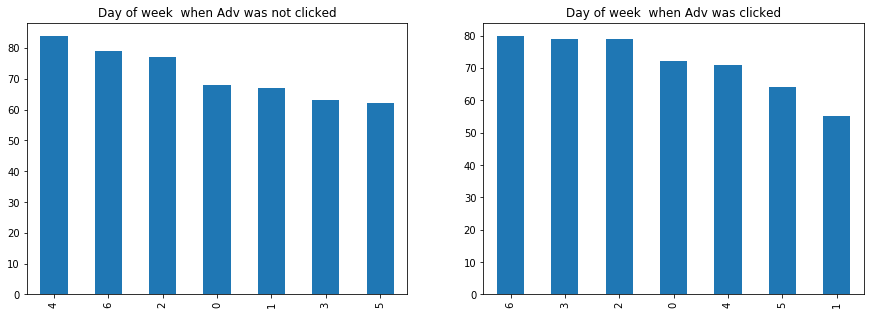

In [38]:
## On what days of the week  was the website visited  ? And by those who clicked and didnt ?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = adv_data[adv_data['Clicked'] ==0]['Dayofweek'].value_counts().plot(kind = 'bar')
plt.title('Day of week  when Adv was not clicked')
plt.subplot(1,2,2)
ax2 = adv_data[adv_data['Clicked'] == 1]['Dayofweek'].value_counts().plot(kind = 'bar')
plt.title('Day of week  when Adv was clicked')


On Sunday , we have more number of people clicking the advertisement and on Friday , those not clicking are more.

Text(0.5,1,'Week of year   when Adv was clicked')

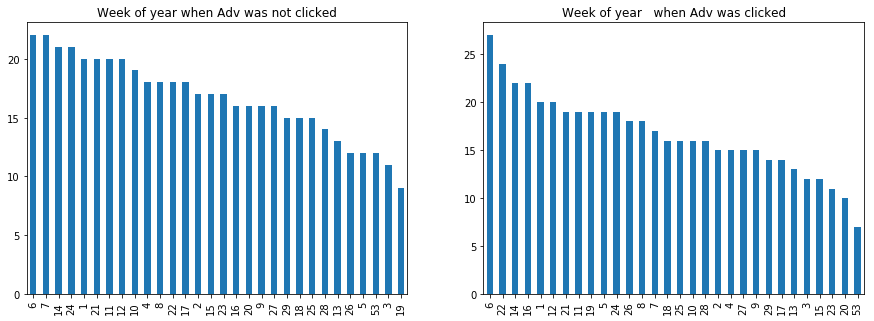

In [39]:
## On which week of the year  was the website visited  ? And by those who clicked and didnt ?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1 = adv_data[adv_data['Clicked'] ==0]['Weekofyear'].value_counts().plot(kind = 'bar')
plt.title('Week of year when Adv was not clicked')
plt.subplot(1,2,2)
ax2 = adv_data[adv_data['Clicked'] == 1]['Weekofyear'].value_counts().plot(kind = 'bar')
plt.title('Week of year   when Adv was clicked')

In [34]:
## How many cities are there ?
len(adv_data['City'].unique().tolist())

969

In [35]:
## How many countries are there ?
len(adv_data['Country'].unique().tolist())

237

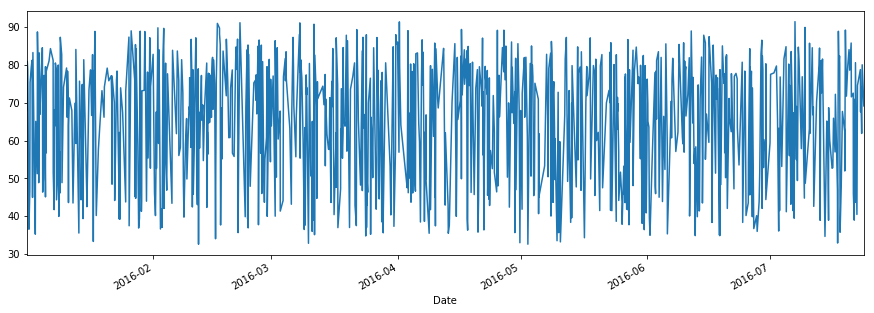

In [42]:
## Daily_time_spent time series plot 
plt.figure(figsize = (15,5))
adv_data.set_index('Date')['Daily_time_spent'].plot()

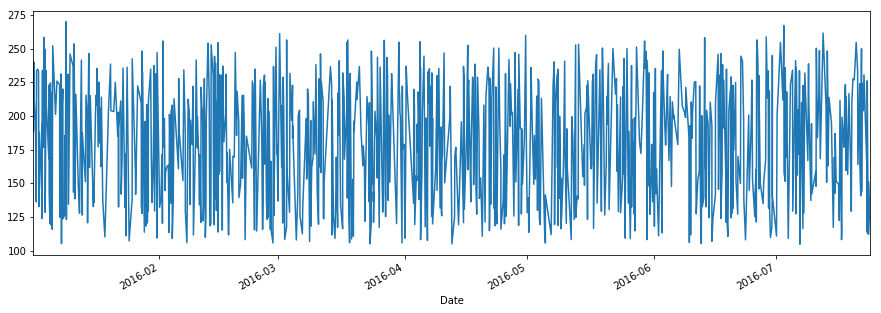

In [43]:
## Daily_internet_usage time series plot
plt.figure(figsize = (15,5))
adv_data.set_index('Date')['Daily_internet_usage'].plot()

In [13]:
cols = ['Daily_time_spent', 'Age', 'Area_income', 'Daily_internet_usage']
## Perform a basic logistic regression 
adv_mod = sm.logit('Clicked ~ Age' , data = adv_data).fit()
print(adv_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.556140
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: Clicked          Pseudo R-squared: 0.198    
Date:               2020-05-28 22:04 AIC:              1116.2809
No. Observations:   1000             BIC:              1126.0964
Df Model:           1                Log-Likelihood:   -556.14  
Df Residuals:       998              LL-Null:          -693.15  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept   -5.1649    0.3754  -13.7575  0.0000  -5.9008  -4.4291
Age          0.1449    0.0105   13.8344  0.0000   0.1244   0.1654



In [15]:
X_train, X_test, y_train, y_test  = train_test_split(adv_data['Age'], adv_data['Clicked'] , random_state = 1 , test_size = 0.2)

In [40]:
## Perform logistic regression.

def perform_logreg(model , X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    
    print("Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)
    

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    print("\n Coefficients {}".format(model.coef_))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

Train Score : 0.71
Train Accuracy using predicted labels :0.71
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.750
Confusion matrix :
[[83 20]
 [30 67]]

 Coefficients [[ 0.1426744]]


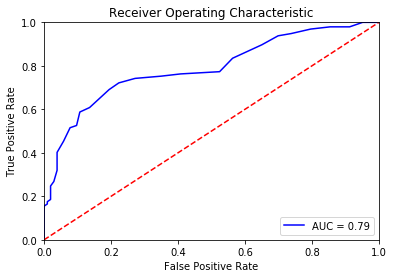

In [20]:
lg = LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
perform_logreg(lg , X_train,X_test,y_train,y_test )


 Adding ['Age']
 X_train :(800, 1)
 X_test :(200, 1)
 y_train :(800,)
 y_test :(200,)
Train Score : 0.71
Train Accuracy using predicted labels :0.71
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.750
Confusion matrix :
[[83 20]
 [30 67]]

 Coefficients [[ 0.12325319]]


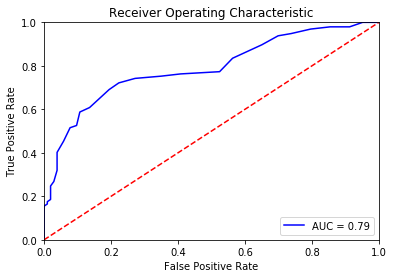


 Adding ['Age', 'Daily_time_spent']
 X_train :(800, 2)
 X_test :(200, 2)
 y_train :(800,)
 y_test :(200,)
Train Score : 0.9
Train Accuracy using predicted labels :0.9
Test set score using predicted labels: 0.87
Calculated Test set score: 0.87
Accuracy score :0.870
Confusion matrix :
[[100   3]
 [ 23  74]]

 Coefficients [[ 0.16770296 -0.1568525 ]]


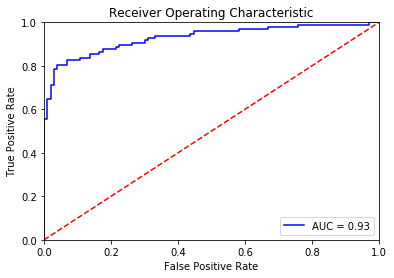


 Adding ['Age', 'Daily_time_spent', 'Area_income']
 X_train :(800, 3)
 X_test :(200, 3)
 y_train :(800,)
 y_test :(200,)
Train Score : 0.89375
Train Accuracy using predicted labels :0.89375
Test set score using predicted labels: 0.86
Calculated Test set score: 0.86
Accuracy score :0.865
Confusion matrix :
[[99  4]
 [23 74]]

 Coefficients [[  2.44157642e-01  -1.00599624e-01  -3.81320152e-05]]


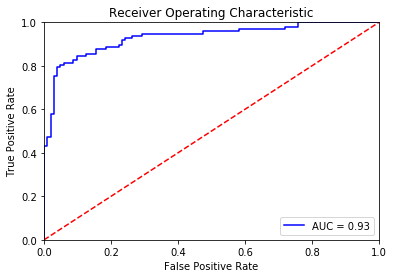


 Adding ['Age', 'Daily_time_spent', 'Area_income', 'Daily_internet_usage']
 X_train :(800, 4)
 X_test :(200, 4)
 y_train :(800,)
 y_test :(200,)
Train Score : 0.89375
Train Accuracy using predicted labels :0.89375
Test set score using predicted labels: 0.89
Calculated Test set score: 0.89
Accuracy score :0.890
Confusion matrix :
[[98  5]
 [17 80]]

 Coefficients [[  2.51358498e-01  -6.28352497e-02  -1.58077380e-05  -2.21810250e-02]]


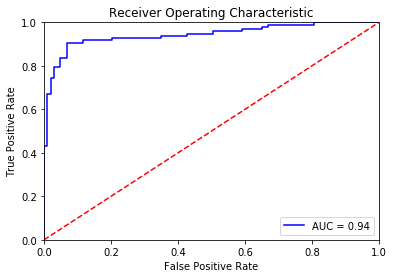

In [18]:
## Add each  variable along with the age  and check for AUC 
cols = ['Age','Daily_time_spent', 'Area_income', 'Daily_internet_usage']

lg = LogisticRegression()
for i in range(len(cols)):
    j = i+1
    print("\n Adding " + str(cols[:j]))
    predictors = adv_data[cols[:j]]
    #predictors = hot_encode(predictors, cols[:j])
    X_train, X_test, y_train, y_test  = train_test_split(predictors, adv_data['Clicked'] , random_state = 1 , test_size = 0.2)
    print(" X_train :{}".format(X_train.shape))
    print(" X_test :{}".format(X_test.shape))
    print(" y_train :{}".format(y_train.shape))
    print(" y_test :{}".format(y_test.shape))

    perform_logreg(lg , X_train,X_test,y_train,y_test)


In [19]:
adv_mod = sm.logit('Clicked ~ Age  + Daily_time_spent + Daily_internet_usage ' , data = adv_data).fit()
print(adv_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.134189
         Iterations 9
                           Results: Logit
Model:                Logit              No. Iterations:     9.0000  
Dependent Variable:   Clicked            Pseudo R-squared:   0.806   
Date:                 2020-05-29 16:32   AIC:                276.3778
No. Observations:     1000               BIC:                296.0088
Df Model:             3                  Log-Likelihood:     -134.19 
Df Residuals:         996                LL-Null:            -693.15 
Converged:            1.0000             Scale:              1.0000  
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            17.0096   1.6014  10.6220 0.0000 13.8710 20.1482
Age                   0.1191   0.0200   5.9509 0.0000  0.0799  0.1584
Daily_time_spent

Add Male and Hour into the model.

In [20]:
adv_mod = sm.logit('Clicked ~ Age + C(Male) + Daily_time_spent + Daily_internet_usage + C(Hour)' , data = adv_data).fit()
print(adv_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.120869
         Iterations 9
                           Results: Logit
Model:                Logit              No. Iterations:     9.0000  
Dependent Variable:   Clicked            Pseudo R-squared:   0.826   
Date:                 2020-05-29 16:33   AIC:                297.7374
No. Observations:     1000               BIC:                435.1545
Df Model:             27                 Log-Likelihood:     -120.87 
Df Residuals:         972                LL-Null:            -693.15 
Converged:            1.0000             Scale:              1.0000  
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            18.9095   2.1780   8.6821 0.0000 14.6408 23.1783
C(Male)[T.1]         -0.2235   0.3709  -0.6025 0.5469 -0.9505  0.5035
C(Hour)[T.1]    

Male column and Hour are not statistically significant in modelling . Hence can be dropped .

In [41]:
adv_mod = sm.logit('Clicked ~ Age + C(Dayofweek) + Daily_time_spent + Daily_internet_usage' , data = adv_data).fit()
print(adv_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.130147
         Iterations 9
                           Results: Logit
Model:                Logit              No. Iterations:     9.0000  
Dependent Variable:   Clicked            Pseudo R-squared:   0.812   
Date:                 2020-06-05 16:09   AIC:                280.2940
No. Observations:     1000               BIC:                329.3716
Df Model:             9                  Log-Likelihood:     -130.15 
Df Residuals:         990                LL-Null:            -693.15 
Converged:            1.0000             Scale:              1.0000  
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            18.1632   1.7649  10.2911 0.0000 14.7040 21.6225
C(Dayofweek)[T.1]    -0.9294   0.6366  -1.4600 0.1443 -2.1771  0.3183
C(Dayofweek)[T.2

In [42]:
adv_mod = sm.logit('Clicked ~ Age + C(Month) + Daily_time_spent + Daily_internet_usage' , data = adv_data).fit()
print(adv_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.130173
         Iterations 9
                           Results: Logit
Model:                Logit              No. Iterations:     9.0000  
Dependent Variable:   Clicked            Pseudo R-squared:   0.812   
Date:                 2020-06-05 16:11   AIC:                280.3462
No. Observations:     1000               BIC:                329.4237
Df Model:             9                  Log-Likelihood:     -130.17 
Df Residuals:         990                LL-Null:            -693.15 
Converged:            1.0000             Scale:              1.0000  
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            17.9947   1.7815  10.1011 0.0000 14.5031 21.4863
C(Month)[T.2]        -0.2708   0.5846  -0.4633 0.6432 -1.4166  0.8750
C(Month)[T.3]   

In [43]:
adv_mod = sm.logit('Clicked ~ Age + C(Weekofyear) + Daily_time_spent + Daily_internet_usage' , data = adv_data).fit()
print(adv_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.120703
         Iterations 9
                           Results: Logit
Model:                Logit              No. Iterations:     9.0000  
Dependent Variable:   Clicked            Pseudo R-squared:   0.826   
Date:                 2020-06-05 16:12   AIC:                307.4070
No. Observations:     1000               BIC:                469.3629
Df Model:             32                 Log-Likelihood:     -120.70 
Df Residuals:         967                LL-Null:            -693.15 
Converged:            1.0000             Scale:              1.0000  
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            19.8335   2.1918   9.0488 0.0000 15.5376 24.1294
C(Weekofyear)[T.2]   -0.3153   1.1618  -0.2714 0.7861 -2.5924  1.9618
C(Weekofyear)[T.

Dayofweek, Month and Weekofyear are not statistically significant in the model.Hence are dropped.  

Perform 5 Kfold cross validation on data with the predictors: Age , Daily_time_spent and Daily_internet_usage.  

In [44]:
kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
lg = LogisticRegression()
scores = cross_val_score(lg , adv_data[['Age','Daily_time_spent','Daily_internet_usage']],adv_data['Clicked'], cv = kf )
predicted = cross_val_predict(lg,adv_data[['Age','Daily_time_spent','Daily_internet_usage']],adv_data['Clicked'], cv = kf , method = 'predict_proba' )
print(scores)
print("\n Avg AUC score :{}".format(scores.mean()))

[ 0.94   0.91   0.95   0.975  0.94 ]

 Avg AUC score :0.943


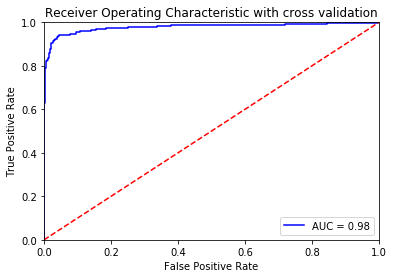

In [45]:
preds = predicted[:,1]
fpr, tpr, thresholds = roc_curve(adv_data['Clicked'], preds)
roc_auc = auc(fpr, tpr)
##
## Plot ROC curve.
plt.title('Receiver Operating Characteristic with cross validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Probability of clicking the advertisement can be modelled as  = 1/(1 + exp(w)) 
where w = 17.0096 + 0.1191*Age -0.1549*Daily_time_spent -0.0579*Daily_internet_usage

